# House Prices Advanced Regression Techniques

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. This dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

The competition challenges you to predict the final price of each home.

For each Id in the test set, you must predict the value of the SalePrice variable.

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Data Exploration

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Handle Missing Data

We will check for null or error data.

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Our most important column is SalePrice. No null value, no negative value.

Skewness: 1.882876
Kurtosis: 6.536282


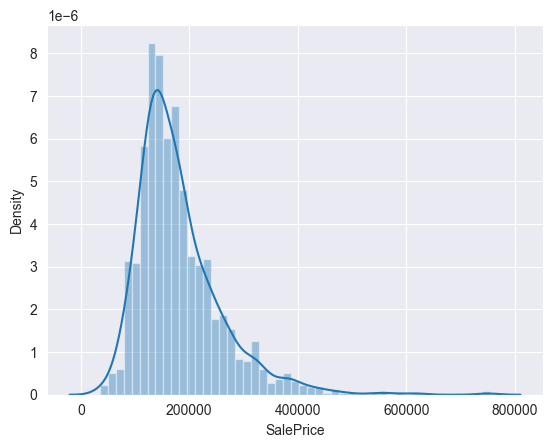

In [6]:
sns.distplot(df_train['SalePrice'])

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

The distribution of SalePrice is not normal. It is right skewed. We will transform it later.

In [7]:
df_null = df_train.isnull().sum().sort_values(ascending=False)
df_null_percent = (df_train.isnull().sum()/df_train.isnull().count() * 100).sort_values(ascending=False)

df_missing = pd.concat([df_null, df_null_percent], axis=1, keys=['Total', 'Percent'])
df_missing.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


Are missing value important? Was they not exist or not recorded?

Check at `data_description.txt`, 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu' are missing value means no pool, no misc feature, no alley access, no fence, no fireplace. We will replace them with 'NA'.

'LotFrontage' is the linear feet of street connected to property. We will replace them with 0.

'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' are missing value means no garage. We will replace them with 'NA'.

'GarageYrBlt', 'GarageArea', 'GarageCars' are missing value means no garage. We will replace them with 0.

'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath' are missing value means no basement. We will replace them with 0.

'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' are missing value means no basement. We will replace them with 'NA'.

'MasVnrArea', 'MasVnrType', 'Electrical' are missing a small number. We will just drop them.

In [8]:
df_train['PoolQC'] = df_train['PoolQC'].fillna('NA')
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('NA')
df_train['Alley'] = df_train['Alley'].fillna('NA')
df_train['Fence'] = df_train['Fence'].fillna('NA')
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NA')

df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)

df_train['GarageType'] = df_train['GarageType'].fillna('NA')
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('NA')
df_train['GarageQual'] = df_train['GarageQual'].fillna('NA')
df_train['GarageCond'] = df_train['GarageCond'].fillna('NA')

df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
df_train['GarageArea'] = df_train['GarageArea'].fillna(0)
df_train['GarageCars'] = df_train['GarageCars'].fillna(0)

df_train['BsmtFinSF1'] = df_train['BsmtFinSF1'].fillna(0)
df_train['BsmtFinSF2'] = df_train['BsmtFinSF2'].fillna(0)
df_train['BsmtUnfSF'] = df_train['BsmtUnfSF'].fillna(0)
df_train['TotalBsmtSF'] = df_train['TotalBsmtSF'].fillna(0)
df_train['BsmtFullBath'] = df_train['BsmtFullBath'].fillna(0)
df_train['BsmtHalfBath'] = df_train['BsmtHalfBath'].fillna(0)

df_train['BsmtQual'] = df_train['BsmtQual'].fillna('NA')
df_train['BsmtCond'] = df_train['BsmtCond'].fillna('NA')
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('NA')
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('NA')
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('NA')

df_train_no_missing = df_train.dropna()
df_train_no_missing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


Check the stat of the filled data.

In [9]:
df_train_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   object 
 8   LandContour    1451 non-null   object 
 9   Utilities      1451 non-null   object 
 10  LotConfig      1451 non-null   object 
 11  LandSlope      1451 non-null   object 
 12  Neighborhood   1451 non-null   object 
 13  Condition1     1451 non-null   object 
 14  Condition2     1451 non-null   object 
 15  BldgType       1451 non-null   object 
 16  HouseStyle     1451 non-null   object 
 17  OverallQual    1451 non-null   int64  
 18  OverallC

In [10]:
print(f'Total missing values: {df_train_no_missing.isnull().sum().sum()}')

Total missing values: 0


## Data Visualization

In [11]:
continuous_columns = [c for c in df_train_no_missing.columns if df_train_no_missing[c].dtype != 'object']
continuous_columns.remove('Id')

discrete_columns = [c for c in df_train_no_missing.columns if df_train_no_missing[c].dtype == 'object']

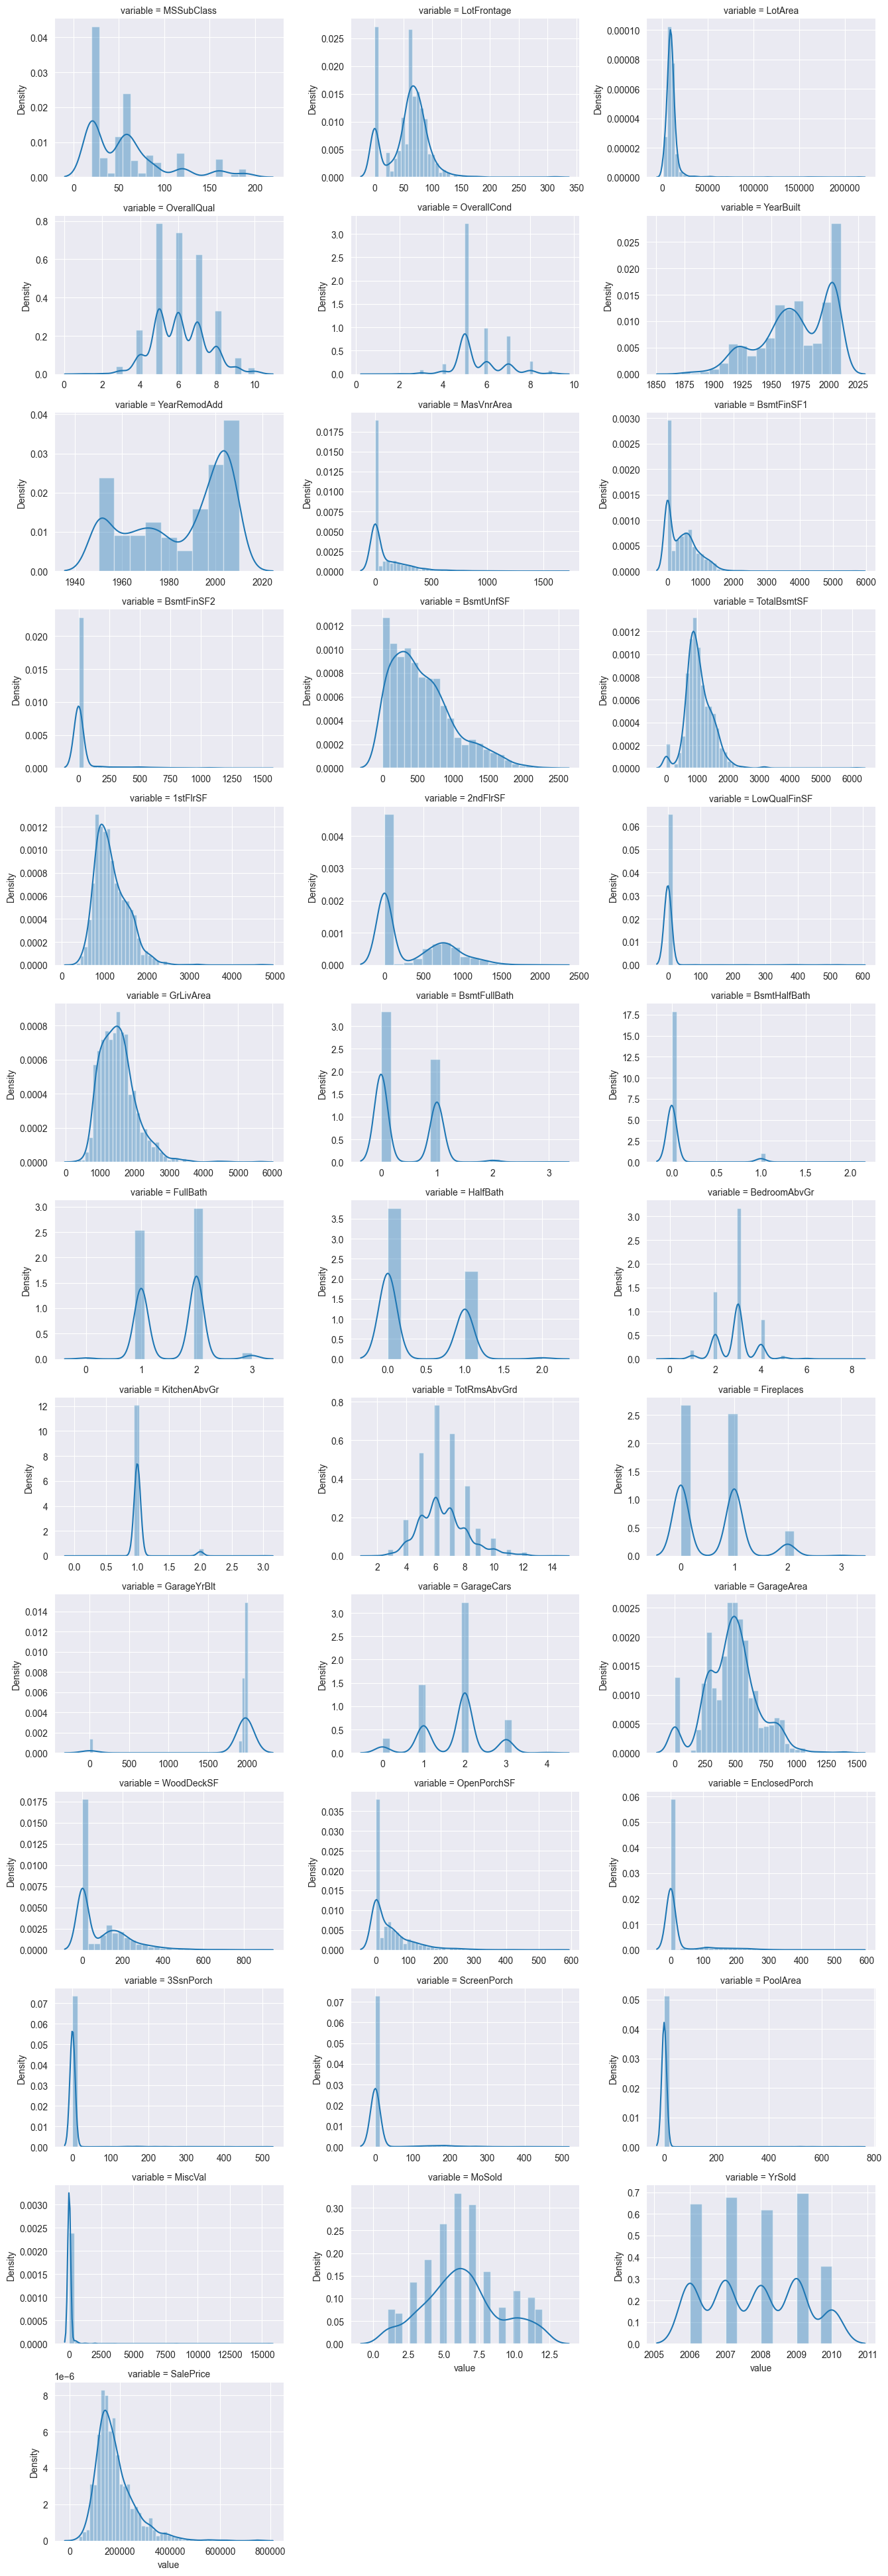

In [12]:
df_continuous_melted = pd.melt(df_train_no_missing, value_vars=continuous_columns)
g = sns.FacetGrid(df_continuous_melted, col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)
g.map(sns.distplot, "value")

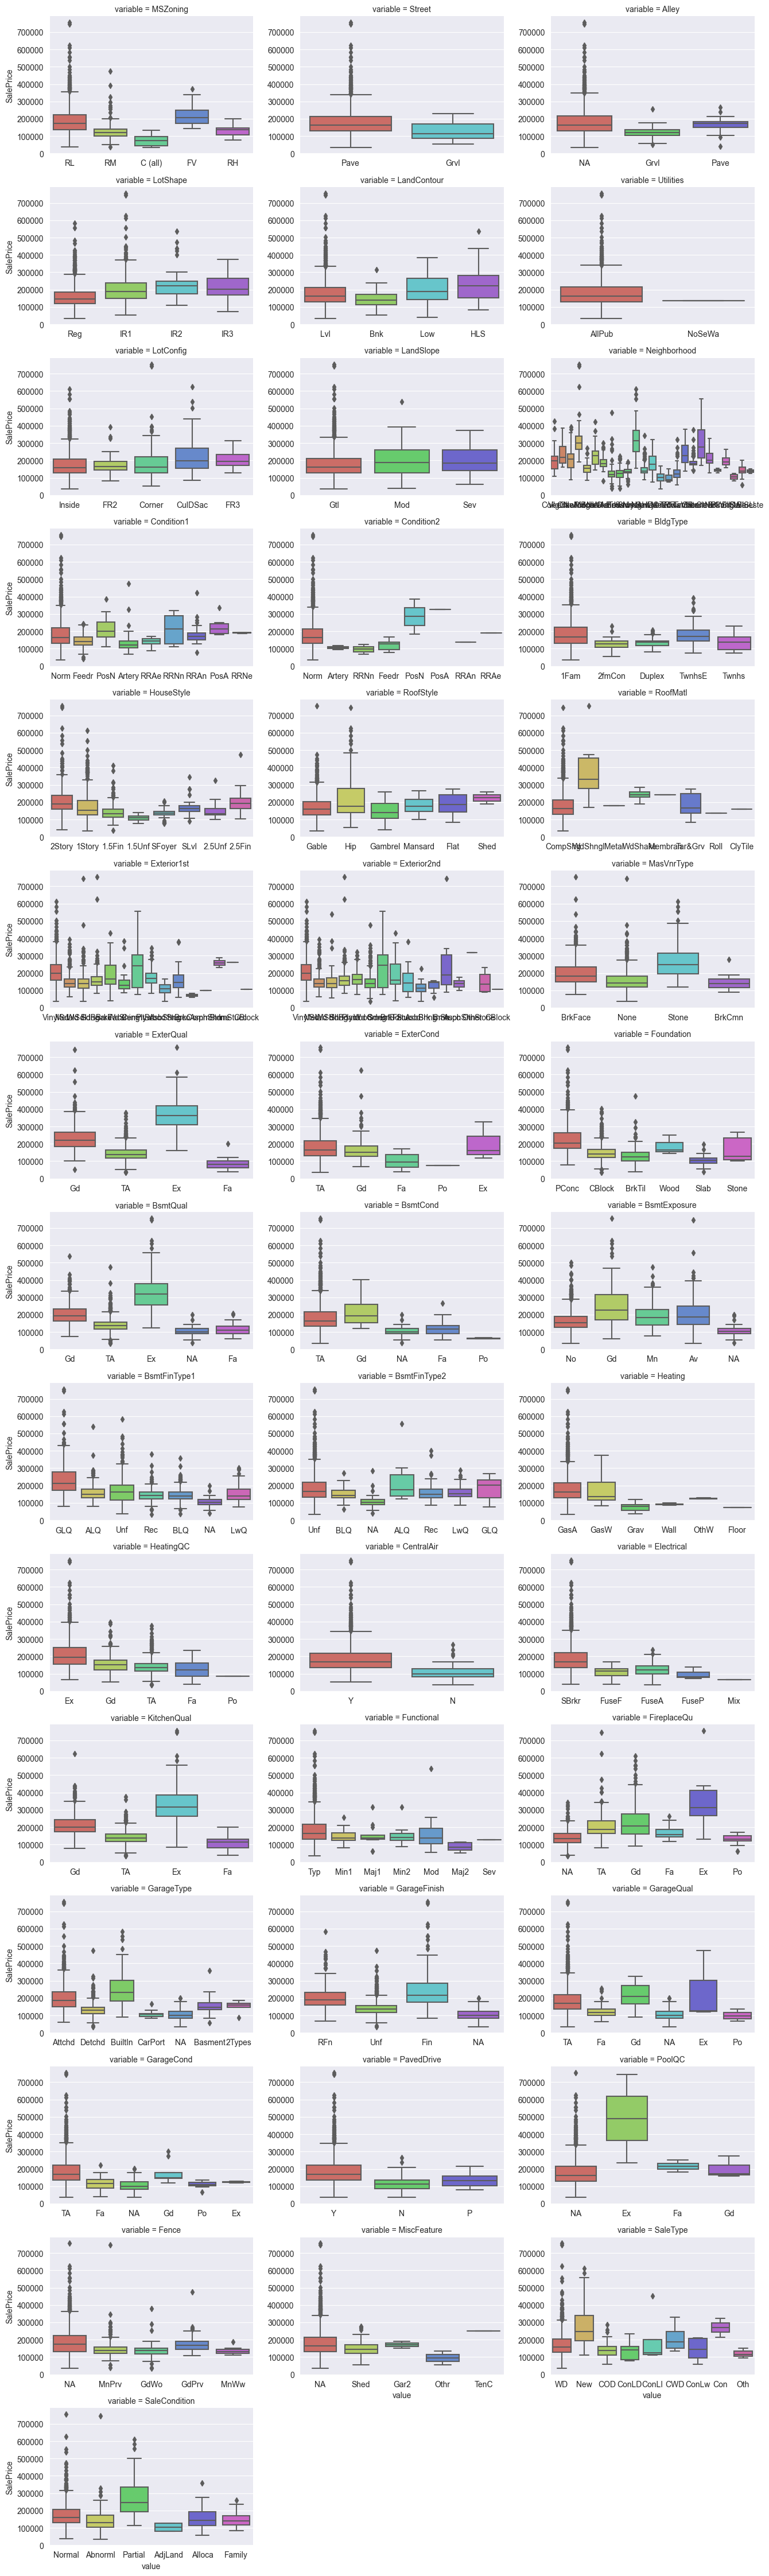

In [28]:
df_discrete_melted = pd.melt(df_train_no_missing, value_vars=discrete_columns, id_vars=['SalePrice'])

g = sns.FacetGrid(df_discrete_melted, col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)

g.map(sns.boxplot, "value", "SalePrice", palette="hls")

Visualize the correlation between SalePrice and other columns.

Text(0.5, 1.0, 'Negative Correlations')

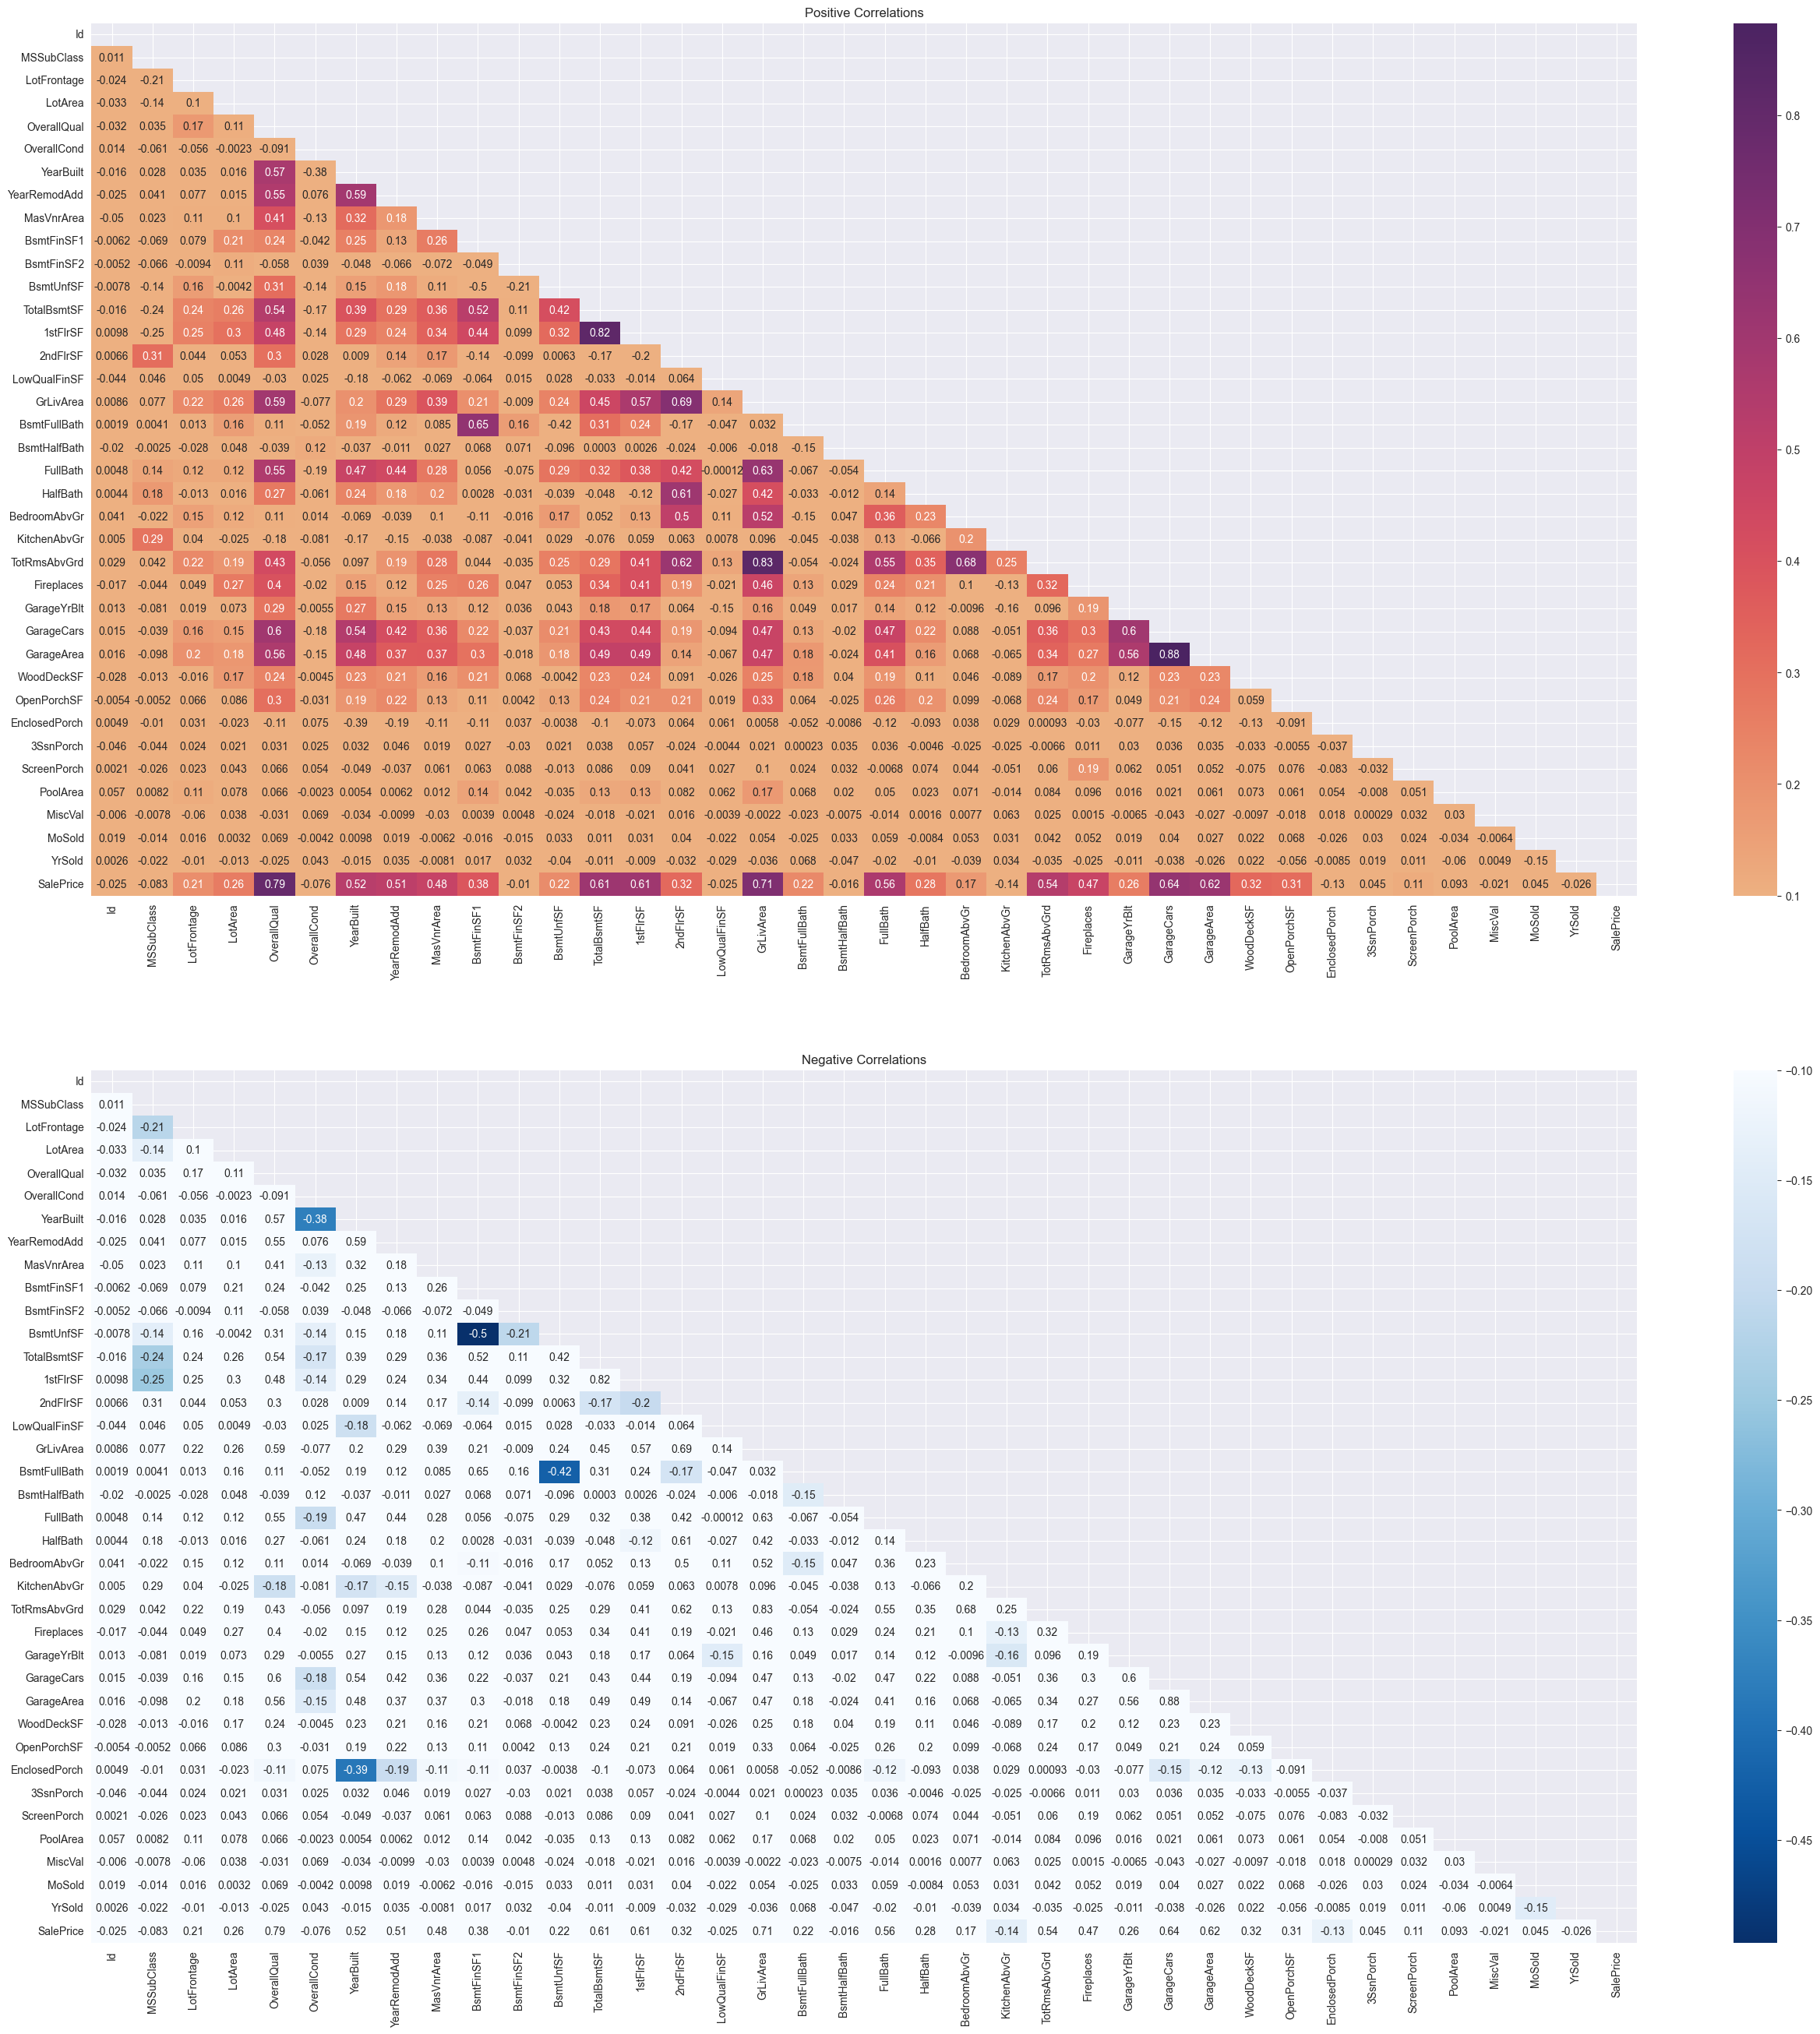

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(32, 32))
corr = df_train_no_missing.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(data=corr, annot=True, cmap='flare', ax=axes[0], mask=mask, vmin=0.1)
axes[0].set_title('Positive Correlations')
sns.heatmap(data=corr, annot=True, cmap='Blues_r', ax=axes[1], mask=mask, vmax=-0.1)
axes[1].set_title('Negative Correlations')

In [15]:
high_correlated_with_sale_price = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
print(f'High correlated columns: {high_correlated_with_sale_price}')

High correlated columns: ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


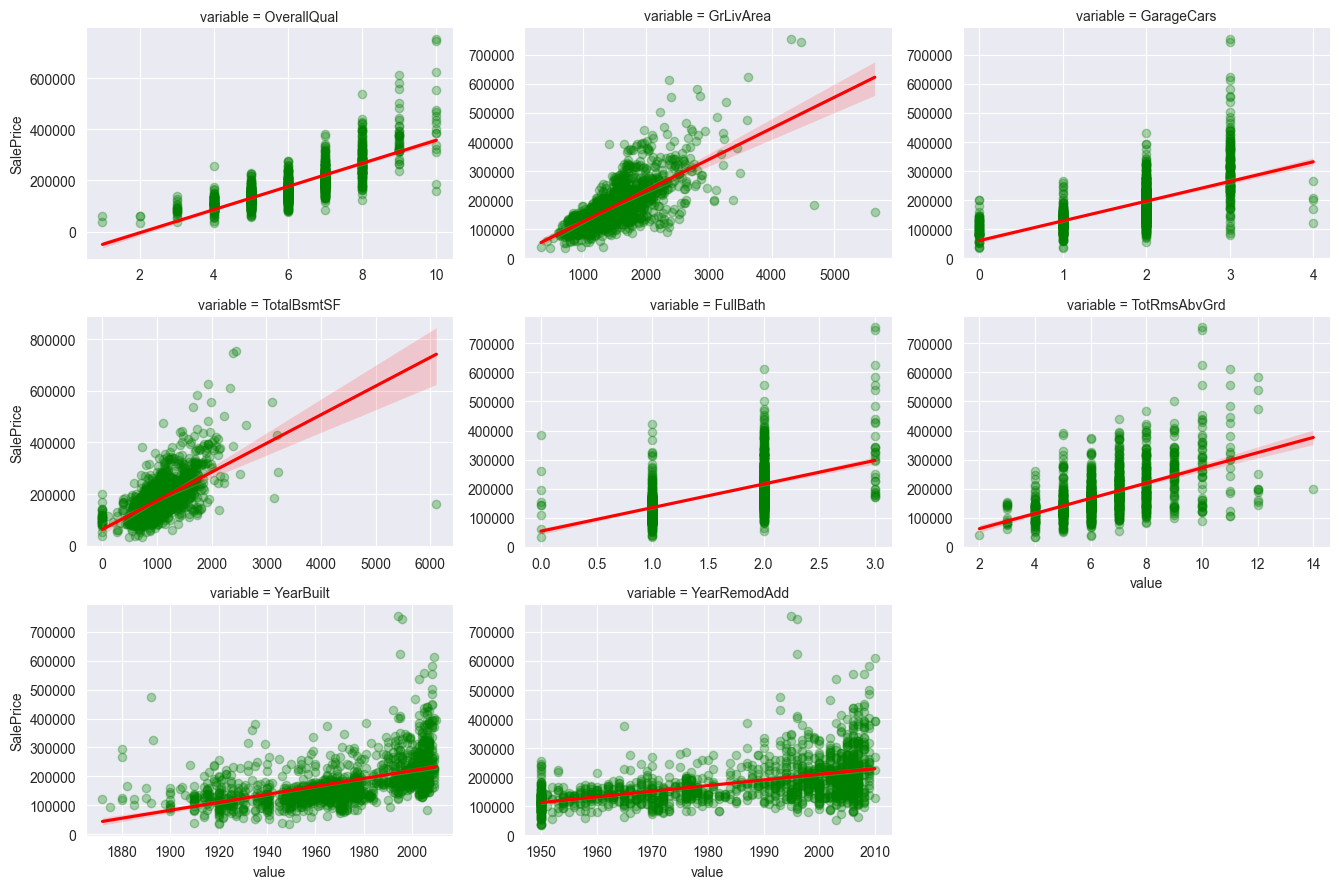

In [16]:
df_high_correlated_melted = pd.melt(df_train_no_missing, value_vars=high_correlated_with_sale_price, id_vars=['SalePrice'])
g = sns.FacetGrid(df_high_correlated_melted, col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)
g.map(sns.regplot, "value", "SalePrice", color='g', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

## Handle Outliner

Check the above graphs, there are not many outliners. We will just drop them manually.

We will look into GrLivArea and TotalBsmtSF. There're some data points that go off trend.

For GarageCars and TotRmsAbvGrd, they may not near the regression line but that just because they don't have enough data for that category.

For YearBuilt and YearRemodAdd, there're some special houses that were very expensive but the regression line looks stable so we will keep them.

In [23]:
print(f"GrLivArea to be dropped: {df_train_no_missing[(df_train_no_missing['GrLivArea']>4000) & (df_train_no_missing['SalePrice']<200000)].index}")
print(f"TotalBsmtSF to be dropped: {df_train_no_missing[(df_train_no_missing['TotalBsmtSF']>6000) & (df_train_no_missing['SalePrice']<200000)].index}")

GrLivArea to be dropped: Int64Index([523, 1298], dtype='int64')
TotalBsmtSF to be dropped: Int64Index([1298], dtype='int64')


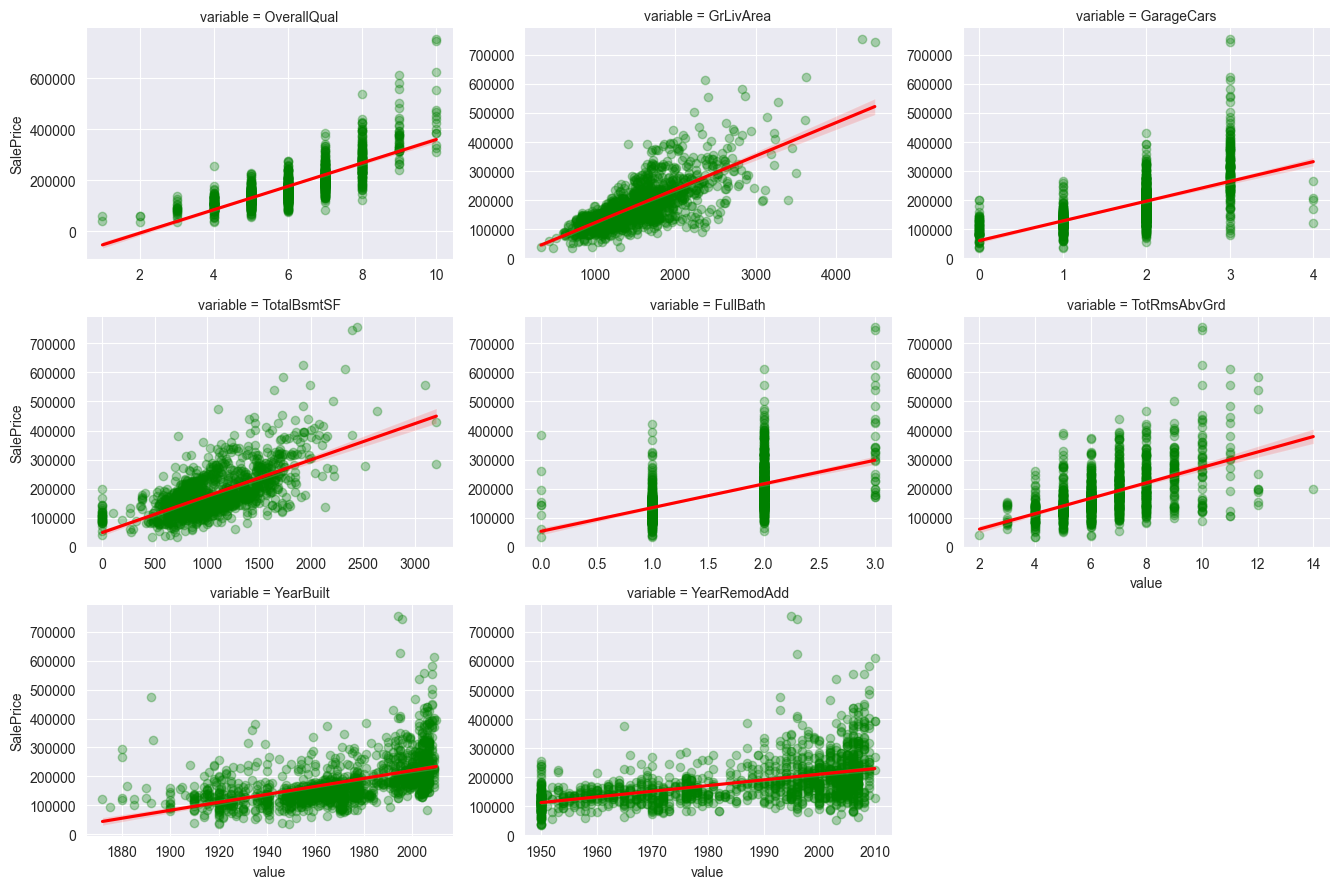

In [26]:
df_no_outliners = df_train_no_missing.drop([523, 1298])
df_no_outliners_melted = pd.melt(df_no_outliners, value_vars=high_correlated_with_sale_price, id_vars=['SalePrice'])
g = sns.FacetGrid(df_no_outliners_melted, col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)
g.map(sns.regplot, "value", "SalePrice", color='g', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})